In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
from wordcloud import WordCloud
from PIL import Image

[nltk_data] Downloading package punkt to /Users/adam/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/adam/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
HR=pd.read_csv("hotel_reviews.csv")

In [3]:
HR['review']=HR.review.astype(str)

In [4]:
HR.head()

,city,name,rating,review
0,Cambridge,A Bed & Breakfast In Cambridge,2,I didn't realize it was a room with shared bat...
1,Cambridge,A Bed & Breakfast In Cambridge,3,"Convenient location, friendly, helpful host. S..."
2,Cambridge,A Bed & Breakfast In Cambridge,4,Very good. Ideal location - just 5 mins walk f...
3,Cambridge,A Bed & Breakfast In Cambridge,4,Building has no resemblance to Expedia photo b...
4,Cambridge,A Bed & Breakfast In Cambridge,2,I stayed in this BB about a month ago. We book...


In [5]:
pd.crosstab(index=HR["rating"], columns="count" ) 

col_0,count
rating,
1,855
2,773
3,1408
4,2212
5,2536


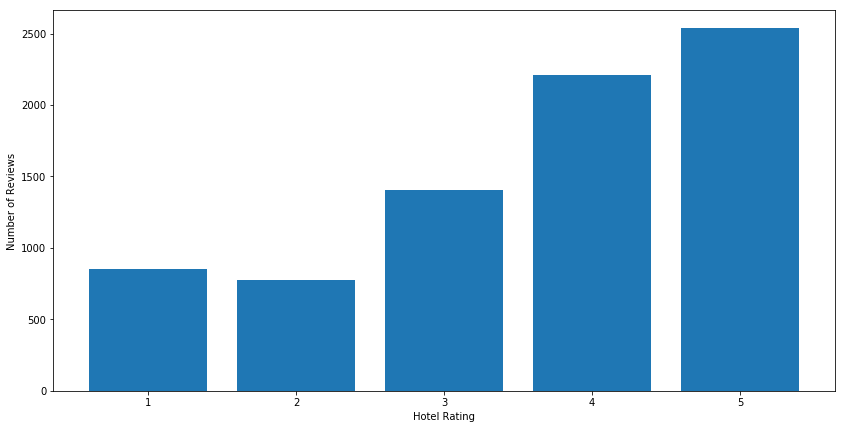

In [6]:
plt.rcParams['figure.figsize'] = (14.0, 7.0)
rating_count=HR.groupby('rating').count()
plt.bar(rating_count.index.values, rating_count['review'])
plt.xlabel('Hotel Rating')
plt.ylabel('Number of Reviews')
plt.show()

In [7]:
def length(text):    
    '''a function which returns the length of text'''
    return len(text)

In [8]:
HR['review'] = HR['review'].str.lower()
HR.head()

,city,name,rating,review
0,Cambridge,A Bed & Breakfast In Cambridge,2,i didn't realize it was a room with shared bat...
1,Cambridge,A Bed & Breakfast In Cambridge,3,"convenient location, friendly, helpful host. s..."
2,Cambridge,A Bed & Breakfast In Cambridge,4,very good. ideal location - just 5 mins walk f...
3,Cambridge,A Bed & Breakfast In Cambridge,4,building has no resemblance to expedia photo b...
4,Cambridge,A Bed & Breakfast In Cambridge,2,i stayed in this bb about a month ago. we book...


In [9]:
stop_words=set(stopwords.words("english"))

In [10]:
HR['review'] = HR['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
HR.head()

,city,name,rating,review
0,Cambridge,A Bed & Breakfast In Cambridge,2,realize room shared bath (4 rooms share one ba...
1,Cambridge,A Bed & Breakfast In Cambridge,3,"convenient location, friendly, helpful host. s..."
2,Cambridge,A Bed & Breakfast In Cambridge,4,good. ideal location - 5 mins walk harvard 10 ...
3,Cambridge,A Bed & Breakfast In Cambridge,4,building resemblance expedia photo well situat...
4,Cambridge,A Bed & Breakfast In Cambridge,2,stayed bb month ago. booked following great re...


In [11]:
HR['review'] = HR['review'].apply(lambda x: ' '.join([word for word in x.split() if word.isalpha()]))
HR.head()

,city,name,rating,review
0,Cambridge,A Bed & Breakfast In Cambridge,2,realize room shared bath rooms share one room ...
1,Cambridge,A Bed & Breakfast In Cambridge,3,convenient helpful somewhat expensive
2,Cambridge,A Bed & Breakfast In Cambridge,4,ideal location mins walk harvard mins mins par...
3,Cambridge,A Bed & Breakfast In Cambridge,4,building resemblance expedia photo well situat...
4,Cambridge,A Bed & Breakfast In Cambridge,2,stayed bb month booked following great thing s...


In [12]:
fdist = HR.review.str.split(expand=True).stack().value_counts()
print(fdist[0:30])

room           3808
hotel          3142
stay           2014
staff          1993
breakfast      1814
great          1591
clean          1468
nice           1419
good           1360
would          1335
stayed         1142
one            1015
rooms          1000
friendly        869
desk            858
front           851
place           846
night           795
bed             708
like            684
get             677
us              641
could           610
location        606
close           599
pool            585
comfortable     577
time            562
check           535
area            515
dtype: int64


In [13]:
wordcloud= WordCloud( background_color="white",max_font_size=40, relative_scaling=.5).generate(str(HR['review']))

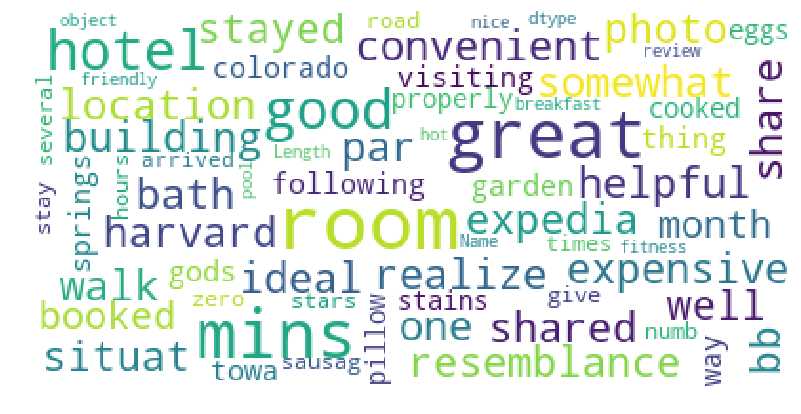

In [14]:
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [15]:
onestar = " ".join(word for word in HR[HR["rating"]==1].review)
fivestar = " ".join(review for review in HR[HR["rating"]==5].review)

In [16]:
wordcloud_one_star= WordCloud(stopwords=stop_words, background_color="white",max_font_size=60, relative_scaling=.5).generate(str(onestar))

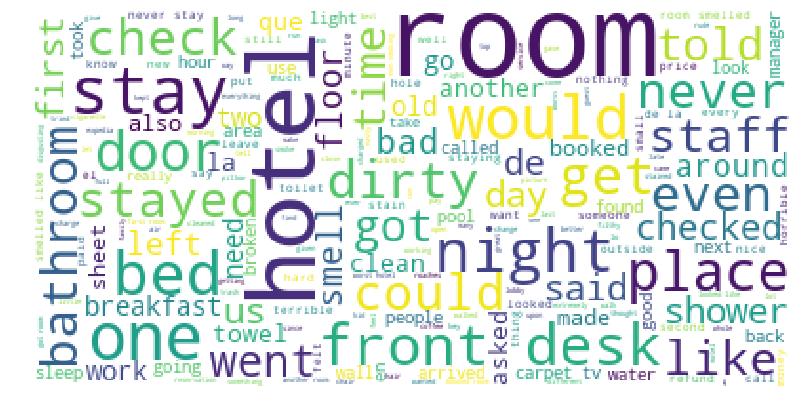

In [17]:
plt.figure()
plt.imshow(wordcloud_one_star)
plt.axis("off")
plt.show()

In [18]:
wordcloud_five_star= WordCloud(stopwords=stop_words, background_color="white",max_font_size=60, relative_scaling=.5).generate(str(fivestar))

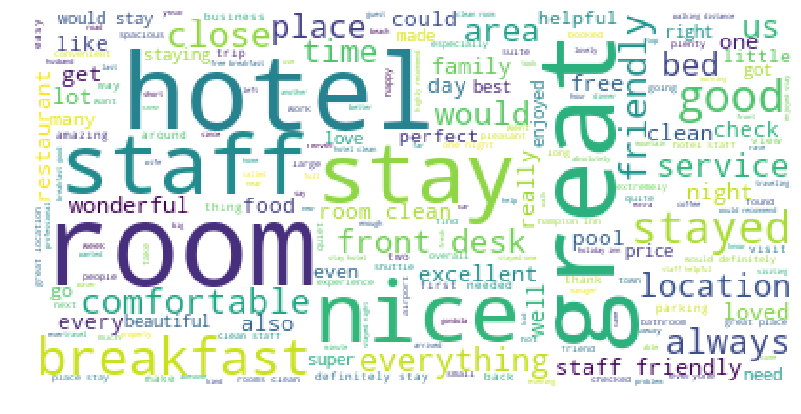

In [19]:
plt.figure()
plt.imshow(wordcloud_five_star)
plt.axis("off")
plt.show()

#### The Naive Bayes model is a probility method that will allow us to predcit a rating score given the review that is provided. In this model the rating score can be predicted by looking at the probability of any given rating and multpilying that by the conditional probability of words used from the review that map to a given rating score. 
#### This model is based on 3 key assumptions :
##### -
##### -
##### -
#### The bag of words assumption can be relaxed when

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [21]:
cv = CountVectorizer(lowercase=False,stop_words=stop_words)
text_counts= cv.fit_transform(HR['review'])

In [22]:
X_train, X_test, y_train, y_test = train_test_split(text_counts, HR['review'], test_size=0.3)

In [28]:
mnb = MultinomialNB()
y_pred = mnb.fit(X_train,y_train).predict(X_test)

In [24]:
print(accuracy_score(y_test,y_pred))

0.04965753424657534


In [25]:
print(confusion_matrix(y_test,y_pred))

[[11  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]


In [26]:
print(classification_report(y_test,y_pred))

/Users/adam/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/adam/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
